In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import partial_dependence

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_colwidth', 1000)
pd.options.display.float_format = '{:.4f}'.format
sns.set()

In [2]:
# load dataset
raw_df = pd.read_csv("bike.csv")
raw_df.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,days_since_2011
0,SPRING,2011,JAN,NO HOLIDAY,SAT,NO WORKING DAY,MISTY,8.1758,80.5833,10.7499,985,0
1,SPRING,2011,JAN,NO HOLIDAY,SUN,NO WORKING DAY,MISTY,9.0835,69.6087,16.6521,801,1
2,SPRING,2011,JAN,NO HOLIDAY,MON,WORKING DAY,GOOD,1.2291,43.7273,16.6367,1349,2


In [3]:
# dummy encode categorical columns
df = pd.get_dummies(data=raw_df)
df.head(3)

,yr,temp,hum,windspeed,cnt,days_since_2011,season_FALL,season_SPRING,season_SUMMER,season_WINTER,mnth_APR,mnth_AUG,mnth_DEC,mnth_FEB,mnth_JAN,mnth_JUL,mnth_JUN,mnth_MAR,mnth_MAY,mnth_NOV,mnth_OCT,mnth_SEP,holiday_HOLIDAY,holiday_NO HOLIDAY,weekday_FRI,weekday_MON,weekday_SAT,weekday_SUN,weekday_THU,weekday_TUE,weekday_WED,workingday_NO WORKING DAY,workingday_WORKING DAY,weathersit_GOOD,weathersit_MISTY,weathersit_RAIN/SNOW/STORM
0,2011,8.1758,80.5833,10.7499,985,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
1,2011,9.0835,69.6087,16.6521,801,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0
2,2011,1.2291,43.7273,16.6367,1349,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0


In [4]:
# train simple model
y = df['cnt']
x = df.drop('cnt', axis=1)

rf = RandomForestRegressor(random_state=42, n_estimators=50, n_jobs=-1,max_depth=5)
rf.fit(x, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

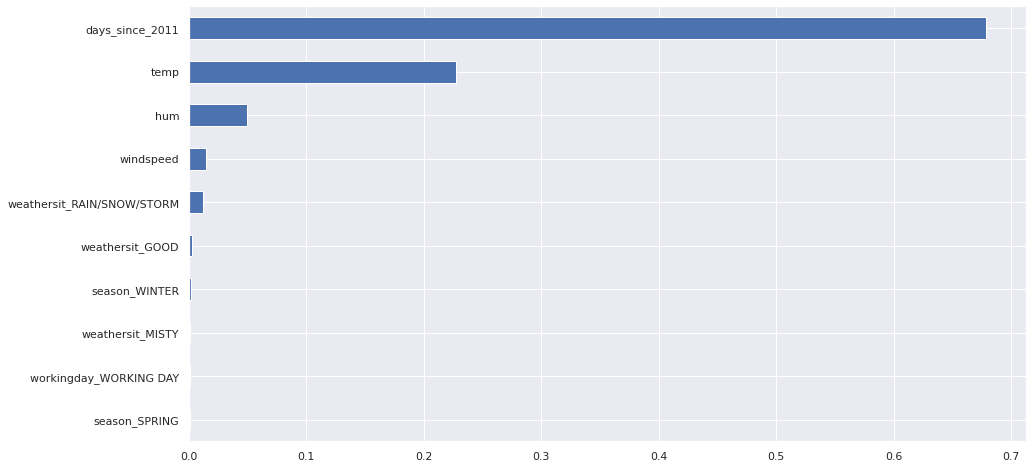

In [5]:
feat_importances = pd.Series(rf.feature_importances_, index=x.columns)
feat_importances.sort_values(ascending=True).tail(10).plot(kind='barh',figsize=(15,8)) 

In [6]:
feat_importances.sum()

1.0

In [7]:
# check rmse
predict = rf.predict(x)
mean_squared_error(y, predict,squared=False)

595.5003611949719

In [8]:
x.head(2)

,yr,temp,hum,windspeed,days_since_2011,season_FALL,season_SPRING,season_SUMMER,season_WINTER,mnth_APR,mnth_AUG,mnth_DEC,mnth_FEB,mnth_JAN,mnth_JUL,mnth_JUN,mnth_MAR,mnth_MAY,mnth_NOV,mnth_OCT,mnth_SEP,holiday_HOLIDAY,holiday_NO HOLIDAY,weekday_FRI,weekday_MON,weekday_SAT,weekday_SUN,weekday_THU,weekday_TUE,weekday_WED,workingday_NO WORKING DAY,workingday_WORKING DAY,weathersit_GOOD,weathersit_MISTY,weathersit_RAIN/SNOW/STORM
0,2011,8.1758,80.5833,10.7499,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
1,2011,9.0835,69.6087,16.6521,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0


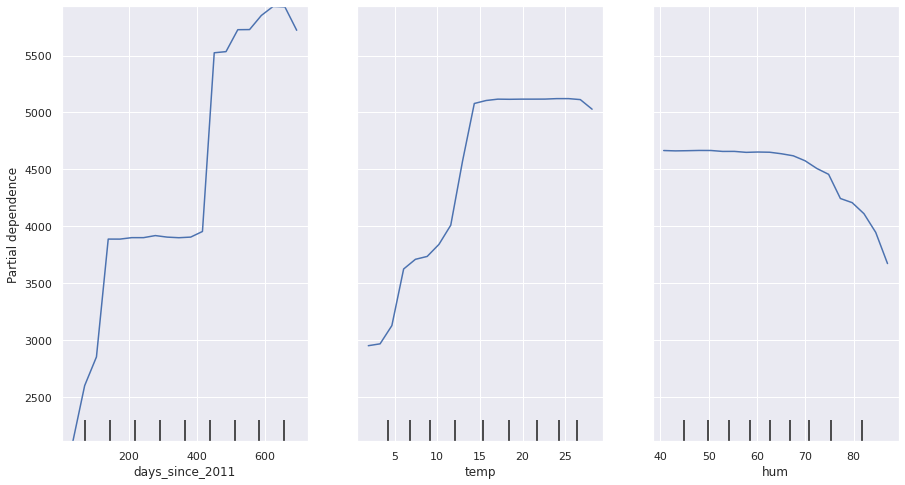

In [9]:
# univarte PDP Plots - numeric
features = ['days_since_2011', 'temp','hum']
fig, ax = plt.subplots(figsize=(15, 8))
fig= plot_partial_dependence(estimator=rf, target=y,X=x,features=features, grid_resolution=20,ax=ax)

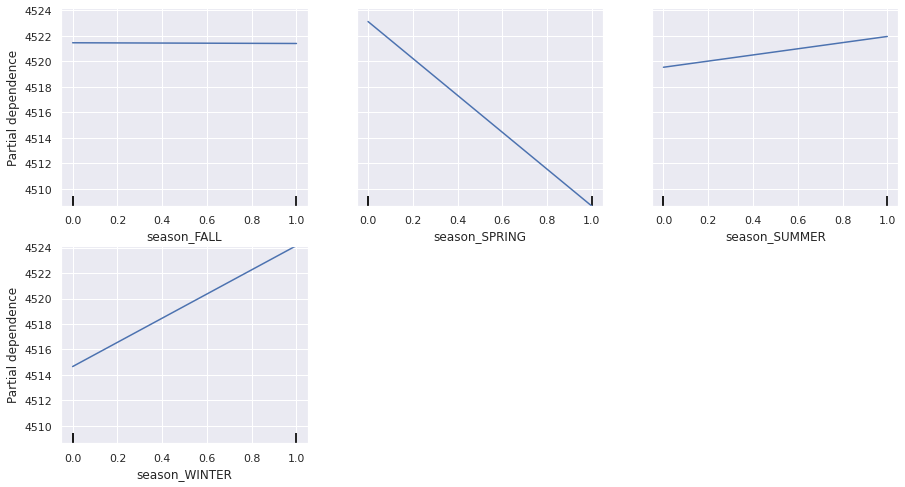

In [10]:
# univarte PDP Plots - numeric
features = ['season_FALL','season_SPRING','season_SUMMER','season_WINTER']
fig, ax = plt.subplots(figsize=(15, 8))
fig= plot_partial_dependence(estimator=rf, target=y,X=x,features=features, grid_resolution=20,ax=ax)

In [11]:
pdp, axes = partial_dependence(rf, x,features=features[0])
pdp,axes

(array([[4521.45750653, 4521.4014737 ]]), [array([0, 1], dtype=uint8)])

<BarContainer object of 4 artists>

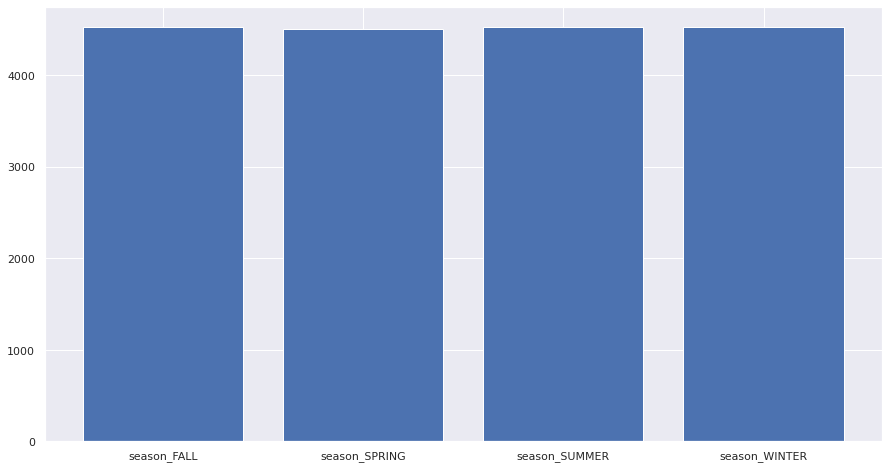

In [12]:
out = {}
for feat in features:
    pdp, axes = partial_dependence(rf, x,features=feat)
    out[feat] = pdp[0][1]

plt.figure(figsize=(15,8))
plt.bar(out.keys(), out.values())

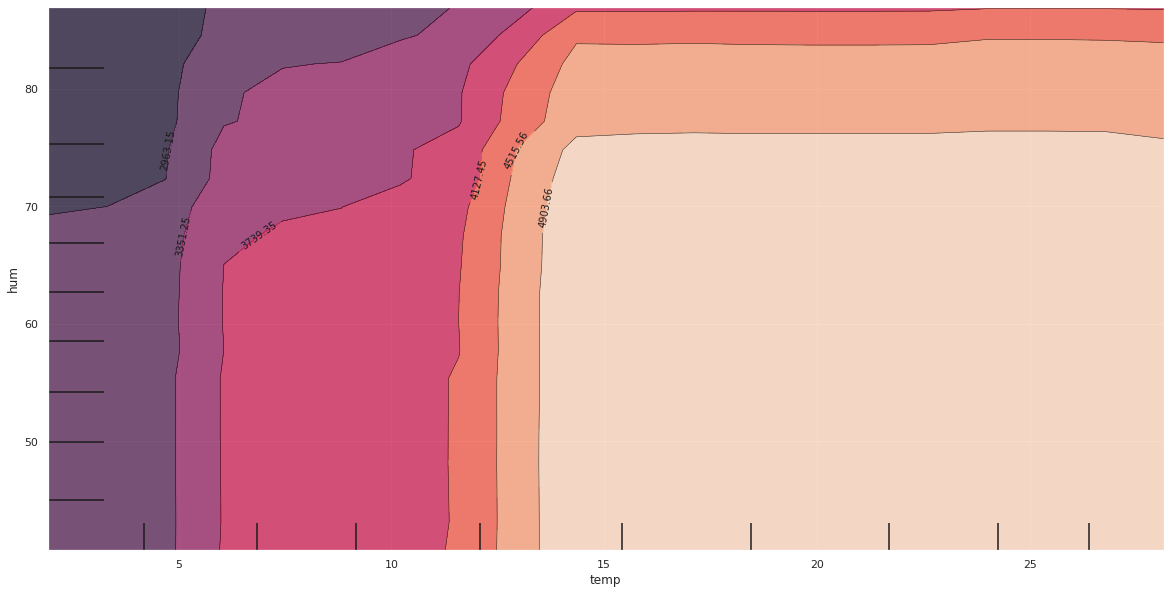

In [13]:
features = [('temp', 'hum')]
fig, ax = plt.subplots(figsize=(20, 10))
plot_partial_dependence(estimator=rf, target=y,X=x, features=features, ax=ax, grid_resolution=20)